## Data Telco : Data Cleansing

### Import Library & Dataset

In [1]:
#Importing Library
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [4]:
print(df.head())
df.customerID.nunique() #unique ID

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV S

7017

Dataset Telco memiliki 7113 rows & 22 columns dengan 7017 jumlah CustomerID unique.

### Filtering customerID With Spesifict Formats

Format untuk memfilter customerID :
- Memiliki panjang karakter 11-12.
- Hanya terdiri dari number saja dan tidak diperbolehkan ada karakte lain selain number.
- Diawali dengan angka 45 pada dua digit pertama.

In [5]:
#Looking for a valid customer ID (telphon number)
df['validID']=df['customerID'].astype(str).str.match(r'(45\d{9,10})')
df=(df[df['validID'] == True].drop('validID', axis=1))
print('Hasil jumlah ID Customer yang terfilter adalah', df['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Setelah memfilter customerID dan menyimpan hasil filter dalam variabel validID, terlihat bahwa jumlah customerID yang valid dan terfilter adalah 7006.

### Dropping Duplicates Rows & Duplicates customerID 

In [6]:
df.drop_duplicates() #Drop Duplicate Rows
df = df.sort_values('UpdatedAt', ascending = False).drop_duplicates(['customerID']) #Drop duplicate ID sorted by Periode
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


### Resolving Missing Values by Dropping Rows

Diasumsikan bahwa data modeller hanya menerima data yang terdapat flag churn atau tidak churn. Sehingga dilakukan penghapusan terhadap baris yang memiliki missing value pada column Churn.

In [7]:
print('Total missing value dari kolom Churn adalah', df['Churn'].isnull().sum())
df.dropna(subset=['Churn'], inplace=True) # Dropping all Rows with spesific column (churn)
print('Total baris dan kolom setelah dihapus data missing values adalah',df.shape)

Total missing value dari kolom Churn adalah 43
Total baris dan kolom setelah dihapus data missing values adalah (6950, 22)


### Resolving Missing Values by Filling Rows with Spesifict Values

Diasumsikan bahwa data modeller meminta pengisian missing values dengan kriteria sebagai berikut :
- Setiap rows yang memiliki missing values untuk Lama berlangganan (Tenure) di isi dengan 11.
- Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

In [8]:
#Overcoming empty data (Missing Values) with certain value
print('Status missing values :', df.isnull().values.any())
print(' Jumlah missing values masing - masing kolom adalah : \n ', df.isnull().sum().sort_values(ascending=False))

Status missing values : True
 Jumlah missing values masing - masing kolom adalah : 
  tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64


In [9]:
# handling missing values Tenure fill with 11
df['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure) fill with median
for col_name in list(['MonthlyCharges','TotalCharges']) :
    median = df[col_name].median()
    df[col_name].fillna(median,inplace=True)


print(' Jumlah missing values masing - masing kolom setelah di imputer datanya adalah : \n ', df.isnull().sum().sort_values(ascending=False))

 Jumlah missing values masing - masing kolom setelah di imputer datanya adalah : 
  Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64


### Detecting Outliers 
Untuk mendeteksi adanya outliers pada tiap variabel kita dapat menggunakan boxplot.

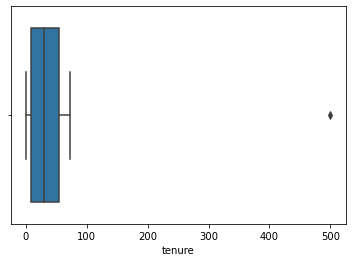

In [10]:
# Detecting Outliers of each Variable
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

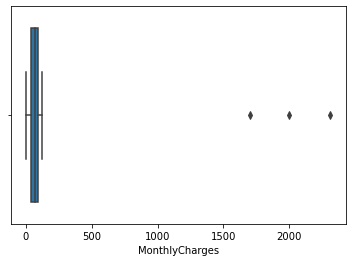

In [11]:
plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

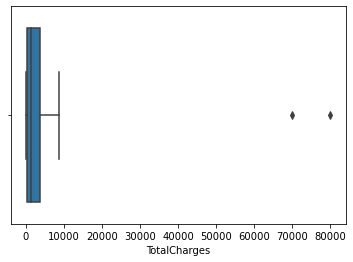

In [12]:
plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

Berdasarkan output boxplot dari ketiga variabel (tenure, MonthlyCharges, TotalCharges) masih terlihat adanya outlier di masing masing varabel. Hal ini diidentifikasi dari adanya titik- titik yang berada jauh dari gambar boxplotnya.  

### Handling Outliers 
Untuk mengatasi outliers kita dapat menggunakan metode interquartile range (IQR). 

In [13]:
#Handling outliers with IQR
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 +(1.5*IQR)
print('Nilai Maximum dari masing-masing variabel adalah:')
print(maximum)

minimum = Q1 -(1.5*IQR)
print('\nNilai Minimum dari masing-masing variabel adalah:')
print(minimum)

Nilai Maximum dari masing-masing variabel adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing variabel adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [14]:
more_than = (df>maximum)
lower_than = (df<minimum)

df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis = 1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())



Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


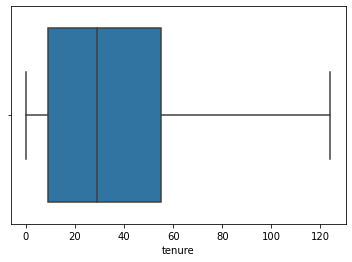

In [15]:
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

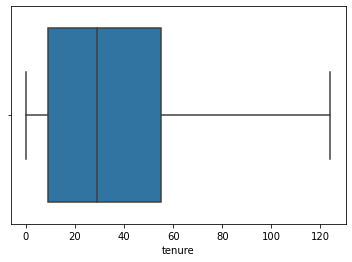

In [16]:
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

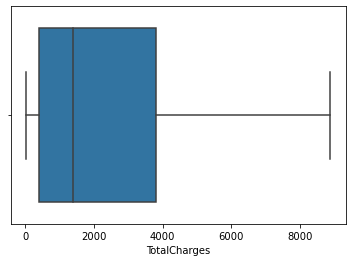

In [17]:
plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

### Detecting NonStandard Values

In [18]:
#Detecting NonStandard Values
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']) : 
    print('\n Unique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df[col_name].value_counts())


 Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

 Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

 Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

 Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

 Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

 Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

 Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

 Unique Values Cou

Berdasarkan output diatas dapat dilihat bahwa ada beberapa variable yang tidak standar, seperti :
- Variabel Gender (Female, Male, Wanita, Laki-Laki) yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
- Variabel Dependents (Yes, No, Iya) yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
- Variabel Churn (Yes, No, Churn) yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

### Standardlize the Values of Each Variables 

In [19]:
#Standardlize the Values Each Variables 
df=df.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


Setelah kita menstandarkan nilai variabel tersebut, amati kembali dataframe yang telah kita bersihkan. Apabila sudah sesuai, maka data siap untuk dimodelkan di tahap selanjutnya.